# Hacktiv8 Phase 1: Graded Challenge 2

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Classification terutama Logistic Regression dan SVM.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![weather](https://images.ctfassets.net/hrltx12pl8hq/6TIZLa1AKeBel0yVO7ReIn/1fc0e2fd9fcc6d66b3cc733aa2547e11/weather-images.jpg?fit=fill&w=800&h=300)

### Dataset

Dataset yang digunakan pada project ini adalah dataset yang berisi tentang cuaca harian dari berbagai stasiun cuaca di Australia selama 10 tahun. Dataset ini berisi 145460 baris dengan 23 kolom yang diantaranya adalah date, location, MinTemp, MaxTemp, dan masih banyak lagi. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).

### Objectives

**Graded Challenge 2** ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memahami konsep Classification dengan Logistic Regression dan SVM.
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM.
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi.

## Import Libraries

Pada project kali ini library yang akan digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [2]:
pd.set_option('display.max_columns', None)

## Data Loading

membuat dataframe `weather` dari file `weatherAUS.csv`.

In [3]:
weather = pd.read_csv('weatherAUS.csv')

In [4]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Data Characteristics

In [5]:
weather.shape

(145460, 23)

Dataframe ini terbentuk dari:
- **145460** baris
- **23** kolom

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari basic info ini dapat diketahui dataframe terbentuk dari:
- 16 kolom bertipe **float**
- 7 kolom bertipe **object**

Dapat diketahui juga terdapat ada missing value pada dataframe.

Kolom `Date` masih bertipe data **object** yang nantinya akan diubah menjadi **datetime**.

In [7]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Jika dilihat dari mean dan mediannya kebanyakan dari kolom numerik di dataframe memiliki distribusi yang normal contohnya pada kolom `MinTemp`, `MaxTemp`, `Temp9am`, dan `Temp3pm`. Kolom-kolom tersebuat memiliki mean dan median yang berdekatan.

## Data Cleaning

### Missing Value Check

Pada bagian ini akan dilakukan pengecekan untuk melihat apakah terdapat missing value pada dataframe.

In [8]:
weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
weather.isna().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

Setelah dilakukan pengecekan, hampir pada **setiap kolom terdapat missing value** dengan kolom `Sunshine` yang memiliki missing value terbanyak yaitu sekitar **48%**. Pada kolom `RainTomorrow` (target) juga terdapat sekitar **2% missing value**, maka missing value pada kolom ini akan dihapus karena jika dilakukan imputasi maka model akan benjadi bias, sedangkan untuk kolom lain akan dilakukan imputasi pada bagian **preprocessing**.

In [10]:
weather = weather[weather.RainTomorrow.notna()]
print(f'Number of missing value in RainTomorrow: {weather.isna().sum()["RainTomorrow"]}')

Number of missing value in RainTomorrow: 0


### Duplicated Data

Pada bagian ini akan dilakukan pengecekan untuk mengetahui apakah terdapat data duplikat pada dataset.

In [11]:
weather.duplicated().sum()

0

Setelah dilakukan pengecekan, **tidak terdapat duplicated data** pada dataset.

### Add Column

Akan membuat 3 kolom baru yang bernama `Day`, `Month`, `Year` yang di extract dari kolom `Date`.

In [12]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Day'] = weather['Date'].dt.day
weather['Month'] = weather['Date'].dt.month
weather['Year'] = weather['Date'].dt.year

In [13]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


## Exploratory Data Analysis (EDA)

### RainTomorrow (Target Column)

In [14]:
print(f'Number of unique values in RainTomorrow column: {weather.RainTomorrow.nunique()}')
print(f'Unique values in RainTomorrow column: {weather.RainTomorrow.unique()}')

Number of unique values in RainTomorrow column: 2
Unique values in RainTomorrow column: ['No' 'Yes']


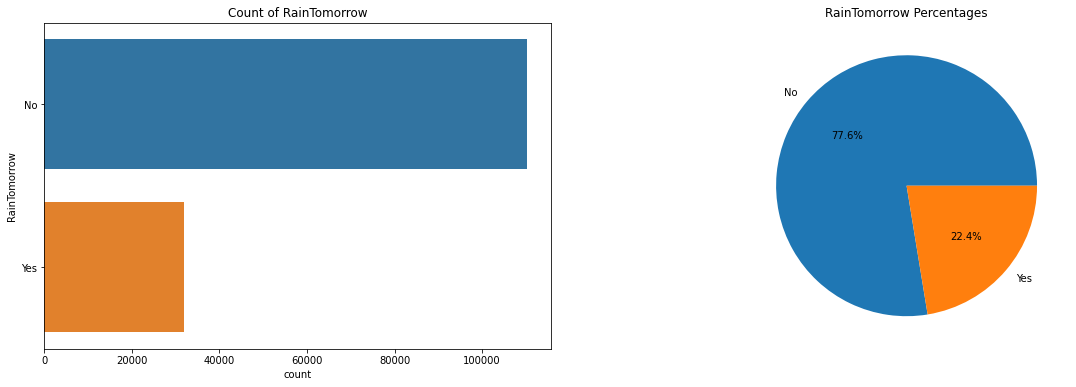

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='RainTomorrow', data=weather)
plt.title('Count of RainTomorrow')
plt.subplot(1, 2, 2)
plt.pie(weather.groupby('RainTomorrow').size(), labels=weather.groupby('RainTomorrow').size().index, autopct='%1.1f%%')
plt.title('RainTomorrow Percentages')
plt.show()

Kolom `RainTommorow` memiliki 2 unique value dengan 77.6% nya adalah **No** yang berjumlah **110316** dan 22.4% nya adalah **Yes** yang berjumlah **31877**.

### Date

In [16]:
print(f'Earliest date: {weather.Date.min().strftime("%B %d, %Y")}')
print(f'Latest date: {weather.Date.max().strftime("%B %d, %Y")}')

Earliest date: November 01, 2007
Latest date: June 25, 2017


Dataset ini mencatat data cuaca selama 10 tahun dari **1 November 2017** sampai **25 Juni 2017**.

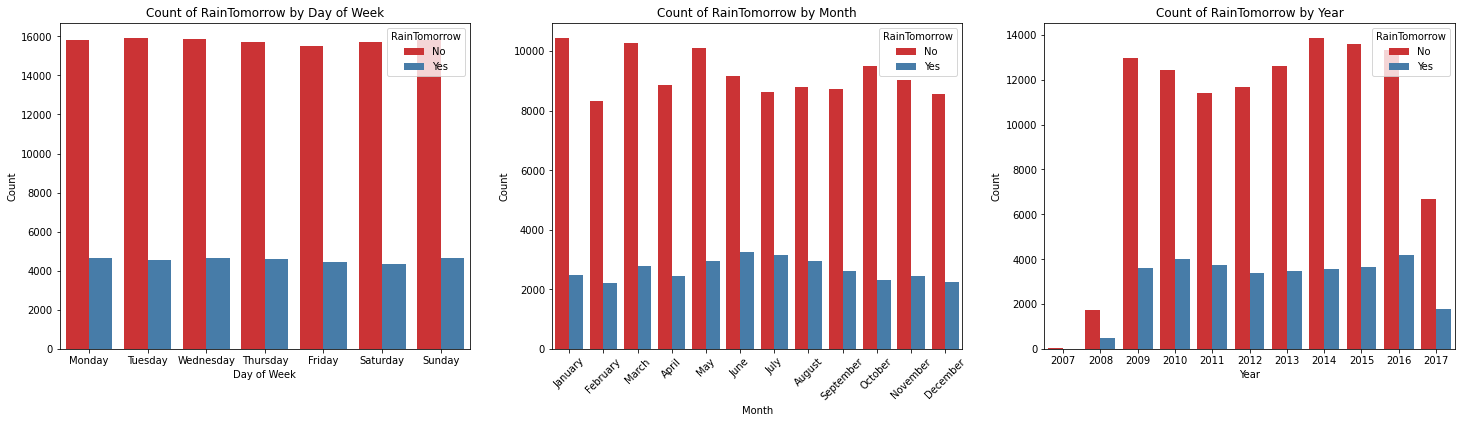

In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.countplot(x=weather.Date.dt.dayofweek, data=weather, palette='Set1', hue='RainTomorrow')
plt.title('Count of RainTomorrow by Day of Week')
plt.xlabel('Day of Week')
plt.xticks(np.arange(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.countplot(x='Month', data=weather, palette='Set1', hue='RainTomorrow')
plt.title('Count of RainTomorrow by Month')
plt.xlabel('Month')
plt.xticks(np.arange(0, 12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.countplot(x='Year', data=weather, palette='Set1', hue='RainTomorrow')
plt.title('Count of RainTomorrow by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Jika dilihat dari count plot diatas, stasiun cuaca lebih banyak mempredisi akan hujan pada bulan Mei hingga July mungkin hal ini disebabkan karena pada bulan-bulan tersebut di Australia sedang terjadi perpindahan musim dari **musim gugur ke musim dingin**. 

### Location

In [18]:
print(f'Number of unique values in Location column: {weather.Location.nunique()}')
print(f'Unique values in Location column: \n{weather.Location.unique()}')

Number of unique values in Location column: 49
Unique values in Location column: 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


Dataset ini mencatat cuaca dari **49 kota** yang berada di Australia.

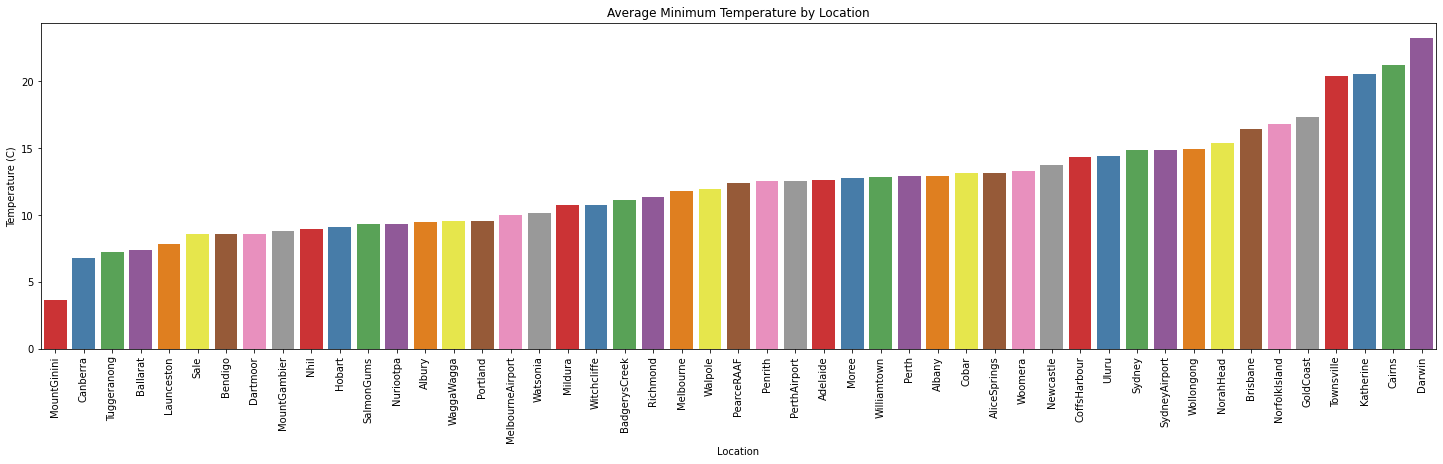

In [19]:
plt.figure(figsize=(25, 6))
sns.barplot(x=weather.groupby('Location').MinTemp.mean().sort_values().index, y=weather.groupby('Location').MinTemp.mean().sort_values().values, palette='Set1')
plt.title('Average Minimum Temperature by Location')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Temperature (C)')
plt.show()

In [20]:
weather.groupby('Location').MinTemp.mean().sort_values().head(3)

Location
MountGinini    3.651193
Canberra       6.827688
Tuggeranong    7.245612
Name: MinTemp, dtype: float64

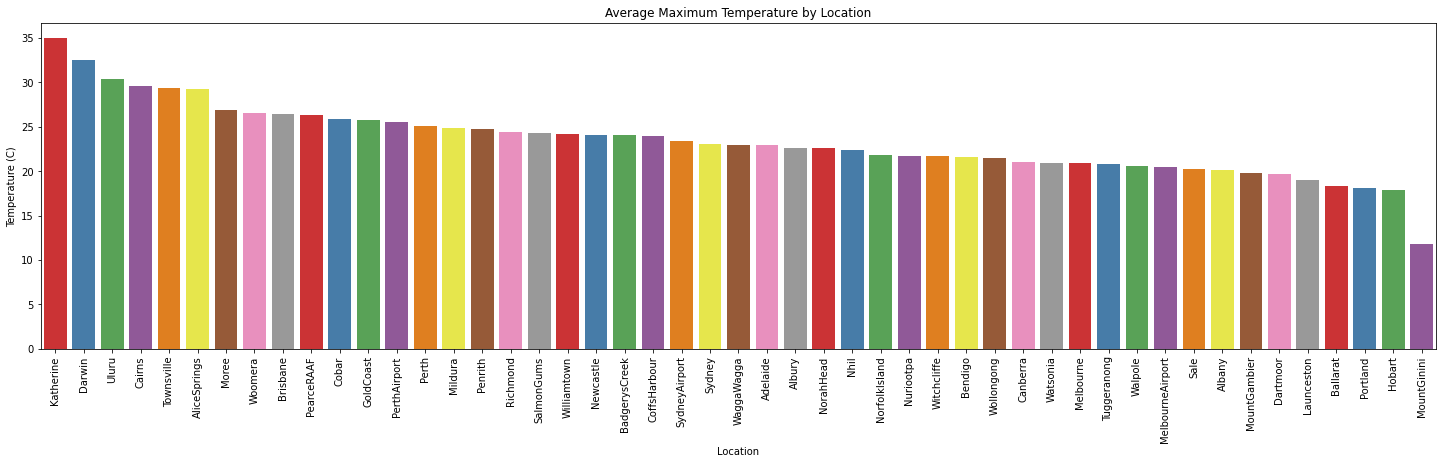

In [21]:
plt.figure(figsize=(25, 6))
sns.barplot(x=weather.groupby('Location').MaxTemp.mean().sort_values(ascending=False).index, y=weather.groupby('Location').MaxTemp.mean().sort_values(ascending=False).values, palette='Set1')
plt.title('Average Maximum Temperature by Location')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Temperature (C)')
plt.show()

In [22]:
weather.groupby('Location').MaxTemp.mean().sort_values(ascending=False).head(3)

Location
Katherine    34.939037
Darwin       32.540977
Uluru        30.387442
Name: MaxTemp, dtype: float64

Di Australia lokasi dengan rata-rata minimum temperature **paling rendah** adalah:
- Mount Ginini **3.6°C**
- Canberra **6.8°C**
- Tuggeranong **7.2°C**

Sedangkan lokasi dengan rata-rata maximum temperature **paling tinggi** adalah:
- Katherine **34.9°C**
- Darwin **32.5°C**
- Uluru **30.4°C**

### MinTemp & MaxTemp

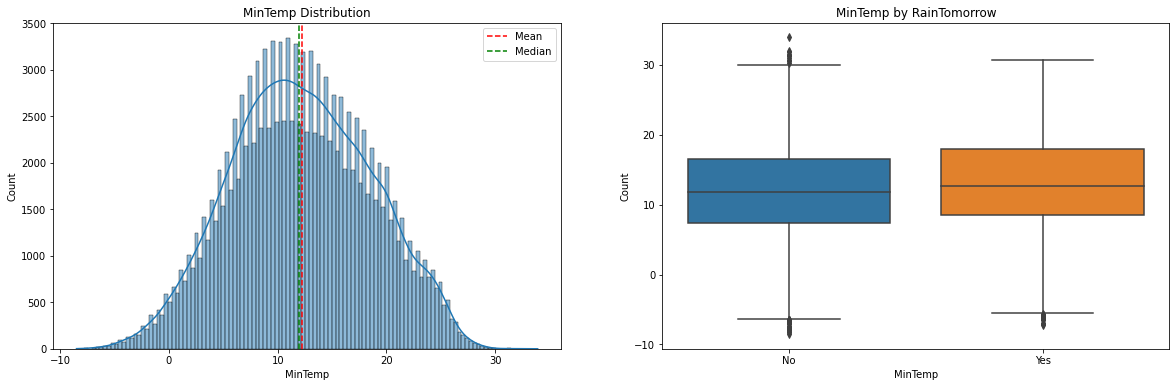

Skewness: 0.02389982065241537
Mean: 12.186399728729265
Median: 12.0


In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='MinTemp', data=weather, kde=True)
plt.axvline(weather.MinTemp.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(weather.MinTemp.median(), color='green', linestyle='--', label='Median')
plt.title('MinTemp Distribution')
plt.xlabel('MinTemp')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='RainTomorrow', y='MinTemp', data=weather)
plt.title('MinTemp by RainTomorrow')
plt.xlabel('MinTemp')
plt.ylabel('Count')
plt.show()
print(f'Skewness: {weather.MinTemp.skew()}')
print(f'Mean: {weather.MinTemp.mean()}')
print(f'Median: {weather.MinTemp.median()}')

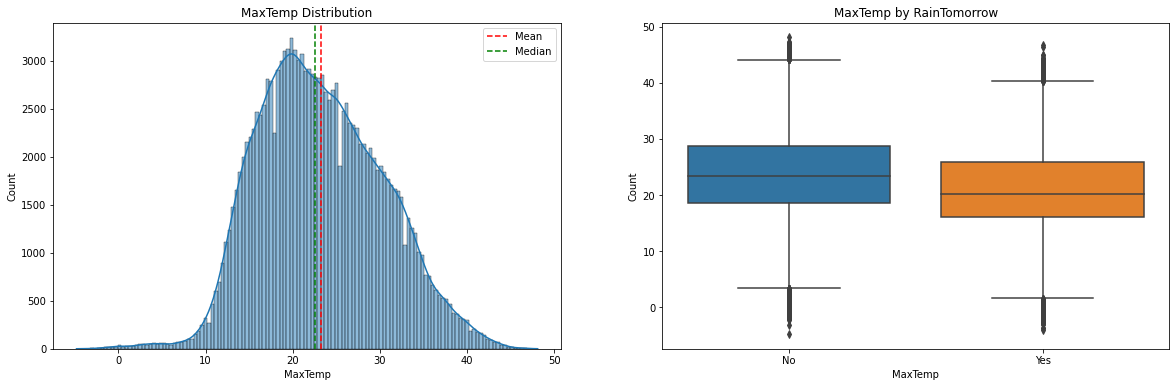

Skewness: 0.22491661455913778
Mean: 23.226784191272355
Median: 22.6


In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='MaxTemp', data=weather, kde=True)
plt.axvline(weather.MaxTemp.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(weather.MaxTemp.median(), color='green', linestyle='--', label='Median')
plt.title('MaxTemp Distribution')
plt.xlabel('MaxTemp')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=weather)
plt.title('MaxTemp by RainTomorrow')
plt.xlabel('MaxTemp')
plt.ylabel('Count')
plt.show()
print(f'Skewness: {weather.MaxTemp.skew()}')
print(f'Mean: {weather.MaxTemp.mean()}')
print(f'Median: {weather.MaxTemp.median()}')

Kolom `MinTemp` dan `MaxTemp` memiliki **distribusi normal** (symmetric) karena nilai skewness kedua kolom ini berada di antara -0.5 dan 0.5 lalu jika dilihat dari box plot kedua kolom ini sepertinya `MinTemp` dan `MaxTemp` memiliki korelasi yang lemah terhadap kolom `RainTomorrow`.

In [25]:
print(f'Coldest temperature is {weather.MinTemp.min()}°C on {weather[weather.MinTemp == weather.MinTemp.min()].Date.dt.strftime("%B %d, %Y").to_string(index=False)} ({weather[weather.MinTemp == weather.MinTemp.min()].Location.to_string(index=False)})')
print(f'Hottest temperature is {weather.MaxTemp.max()}°C on {weather[weather.MaxTemp == weather.MaxTemp.max()].Date.dt.strftime("%B %d, %Y").to_string(index=False)} ({weather[weather.MaxTemp == weather.MaxTemp.max()].Location.to_string(index=False)})')

Coldest temperature is -8.5°C on June 11, 2009 (MountGinini)
Hottest temperature is 48.1°C on January 25, 2011 (Woomera)


Di Australia, suhu terendah yang tercatat adalah **-8.5°C** pada 11 Juni 2009 di **Mount Ginini** yang mana pada bulan tersebut sedang berada pada musim dingin dan suhu tertinggi berada di **Woomera** pada musim panas 25 January 2011 yaitu **48.1°C**.

### RainToday

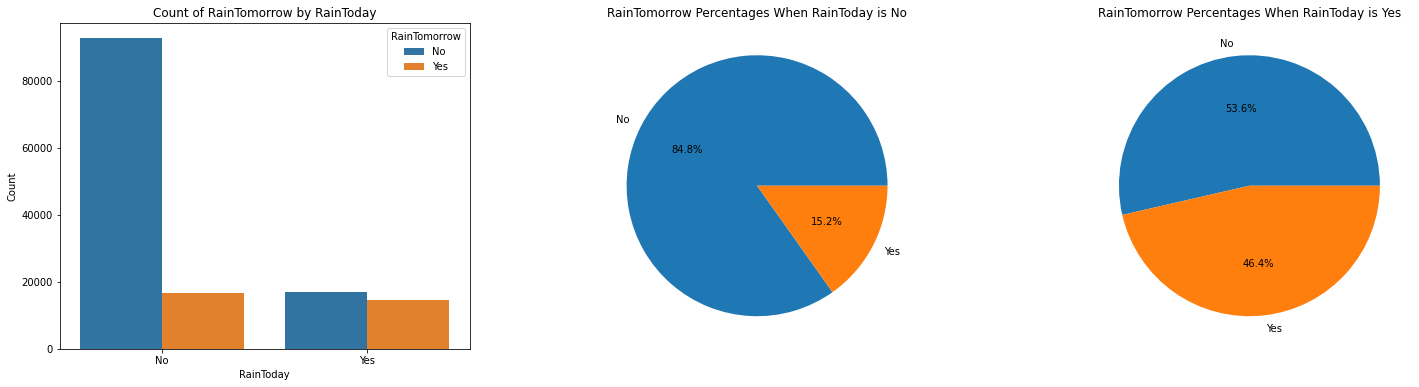

In [26]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='RainToday', data=weather, hue='RainTomorrow')
plt.title('Count of RainTomorrow by RainToday')
plt.xlabel('RainToday')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(weather[weather.RainToday == 'No'].RainTomorrow.value_counts(), labels=weather[weather.RainToday == 'No'].RainTomorrow.value_counts().index, autopct='%1.1f%%')
plt.title('RainTomorrow Percentages When RainToday is No')
plt.subplot(1, 3, 3)
plt.pie(weather[weather.RainToday == 'Yes'].RainTomorrow.value_counts(), labels=weather[weather.RainToday == 'Yes'].RainTomorrow.value_counts().index, autopct='%1.1f%%')
plt.title('RainTomorrow Percentages When RainToday is Yes')
plt.show()

Dapat diketahui dari plot diatas, jika tidak terjadi hujan pada hari ini maka **sangat jarang** stasiun cuaca memprediksi akan terjadi hujan pada esok harinya hanya sekitar **15.2%** saja, sedangkan jika terjadi hujan pada hari ini stasiun cuaca **sering** memprediksi bahwa esok harinya akan hujan sekitar **46%**.

### Correlation Between Numeric Column To RainTomorrow

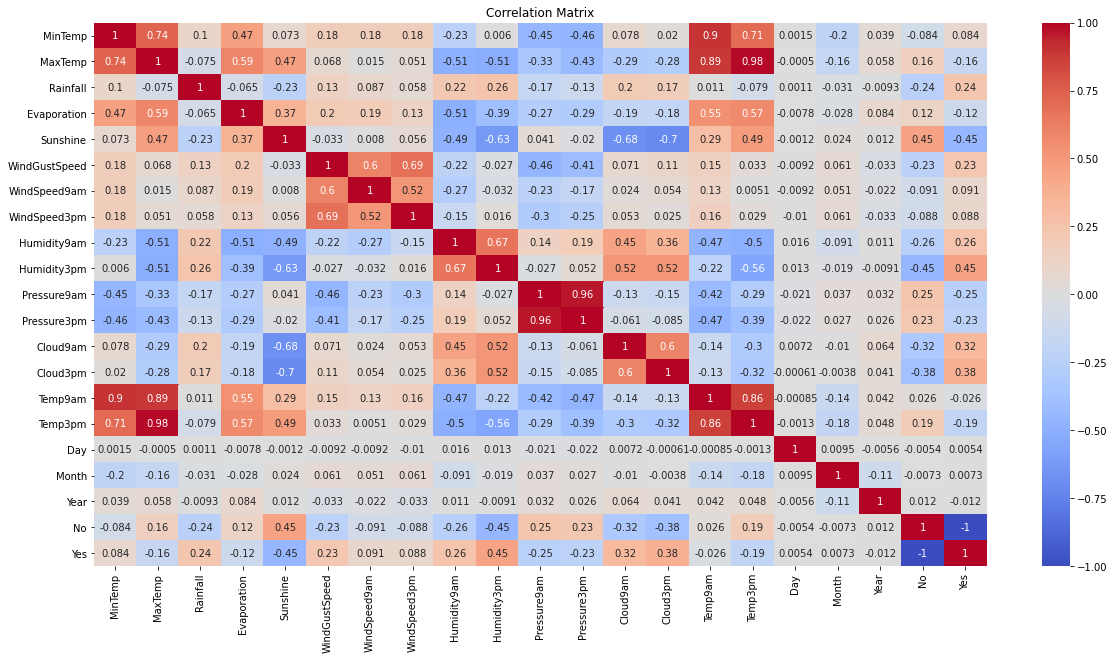

In [27]:
corr = pd.concat([weather, pd.get_dummies(weather.RainTomorrow)], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap diatas, kolom RainTomorrow memiliki korelasi dengan beberapa kolom namun saya akan hanya menggunakan kolom-kolom yang nilai correlationnya lebih dari 0.20 saja. Maka kolom numerik yang akan digunakan sebagai feature adalah kolom `RainFall`, `Sunshine`, `WindGustSpeed`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, Cloud9am, dan `Cloud3pm`.

Kolom numerik lain yang tidak akan digunakan sebagai features akan **dihilangkan dari dataframe**.

In [28]:
weather = weather.drop(columns=['MinTemp', 'MaxTemp', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year', 'Date'])

In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   Rainfall       140787 non-null  float64
 2   Sunshine       74377 non-null   float64
 3   WindGustDir    132863 non-null  object 
 4   WindGustSpeed  132923 non-null  float64
 5   WindDir9am     132180 non-null  object 
 6   WindDir3pm     138415 non-null  object 
 7   Humidity9am    140419 non-null  float64
 8   Humidity3pm    138583 non-null  float64
 9   Pressure9am    128179 non-null  float64
 10  Pressure3pm    128212 non-null  float64
 11  Cloud9am       88536 non-null   float64
 12  Cloud3pm       85099 non-null   float64
 13  RainToday      140787 non-null  object 
 14  RainTomorrow   142193 non-null  object 
dtypes: float64(9), object(6)
memory usage: 21.4+ MB


Sekarang dataframe hanya memiliki **14 kolom**.

### Correlation Between Categorical Column To RainTomorrow

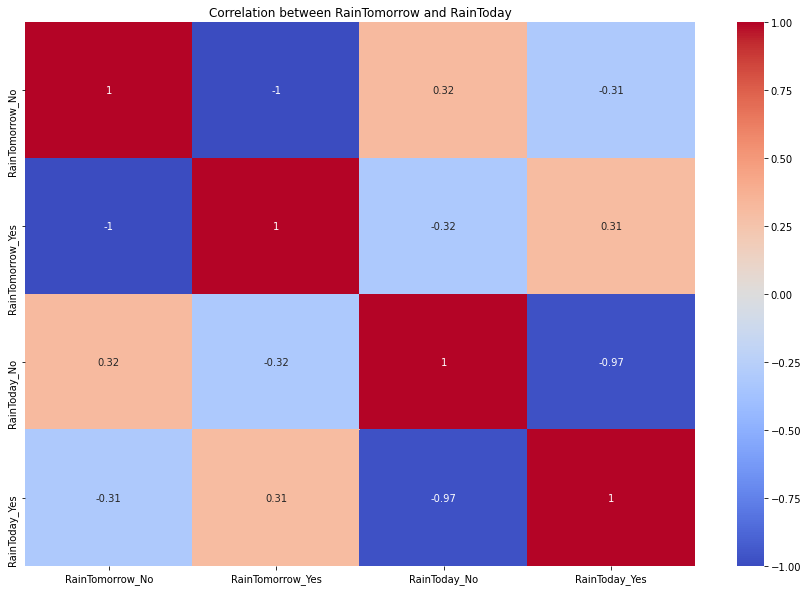

In [30]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'RainToday']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and RainToday')
plt.show()

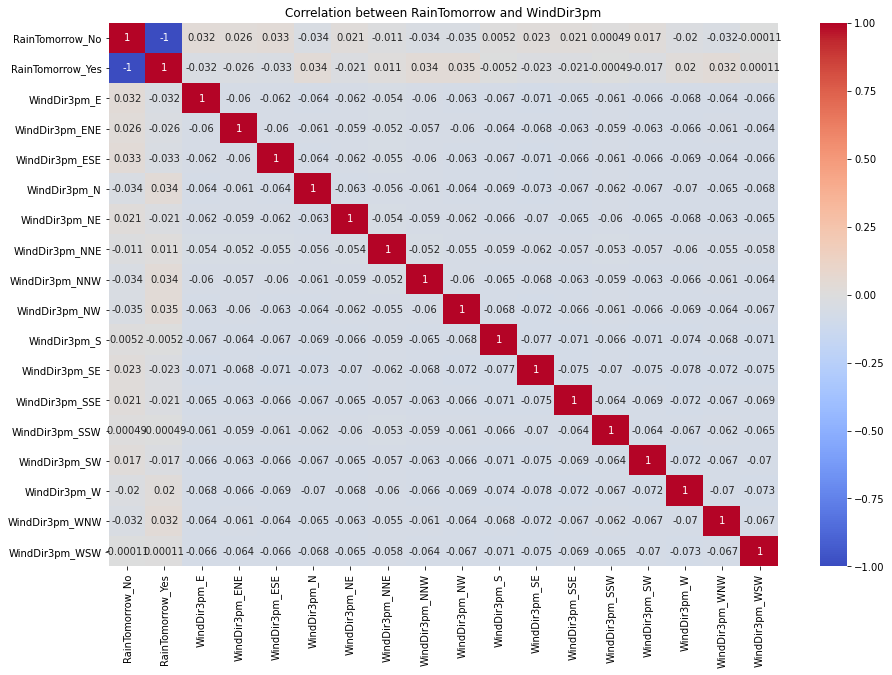

In [31]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'WindDir3pm']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and WindDir3pm')
plt.show()

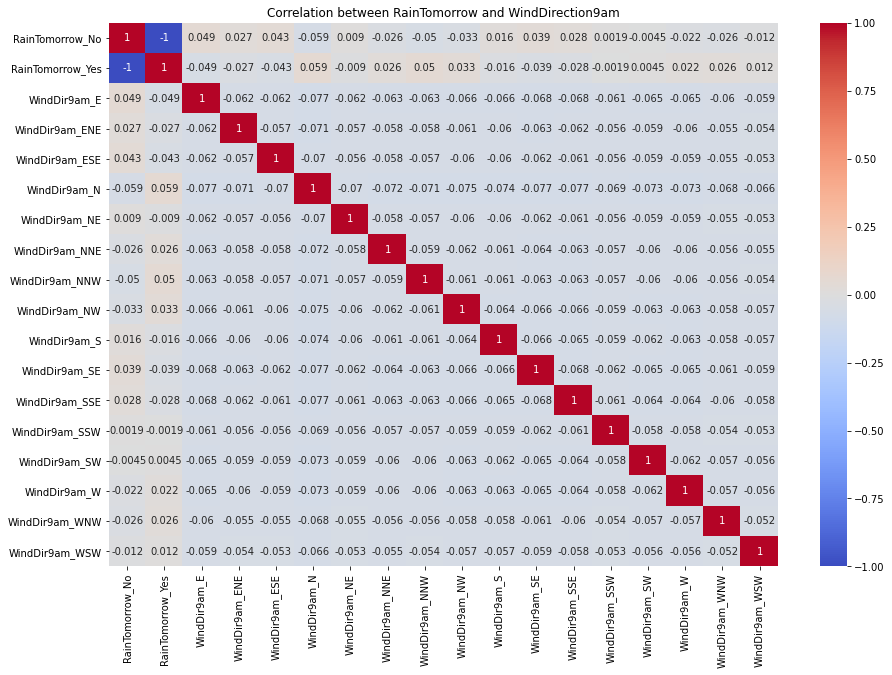

In [32]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'WindDir9am']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and WindDirection9am')
plt.show()

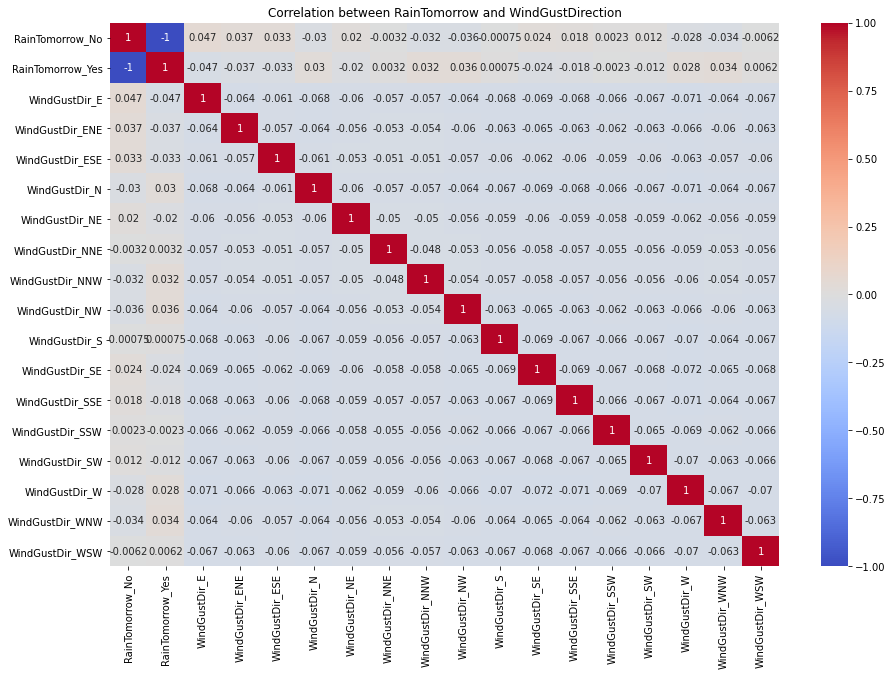

In [33]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'WindGustDir']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm', annot=True)
plt.title('Correlation between RainTomorrow and WindGustDirection')
plt.show()

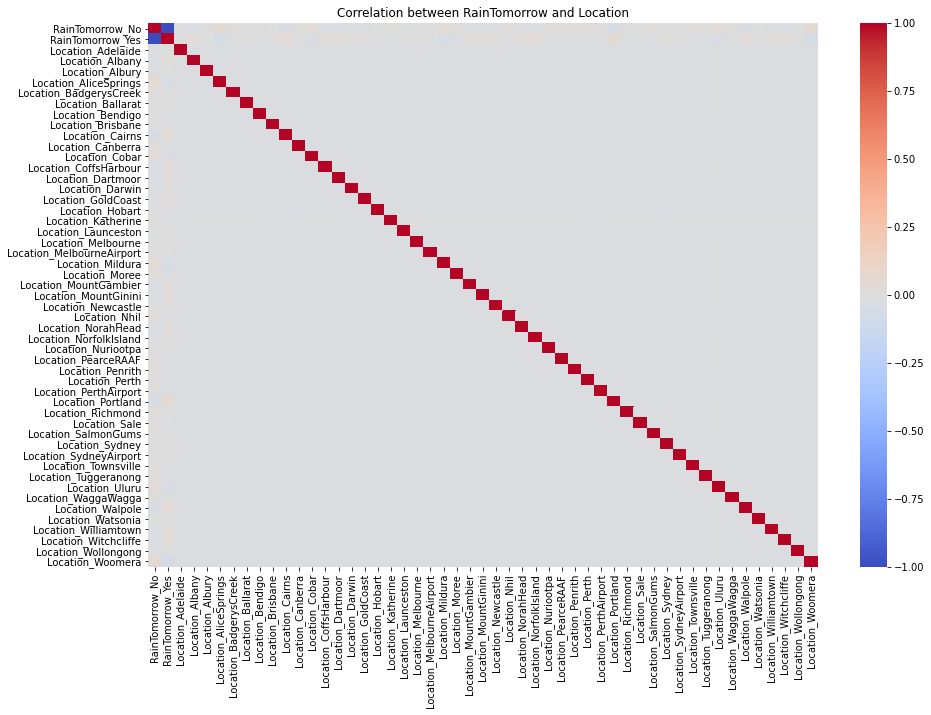

In [34]:
plt.figure(figsize=(15, 10))
corr_cat = pd.get_dummies(weather[['RainTomorrow', 'Location']]).corr()
sns.heatmap(corr_cat, cmap='coolwarm')
plt.title('Correlation between RainTomorrow and Location')
plt.show()

Jika dilihat dari 5 kolom yang bertipe data kategori ini, sepertinya kolom `RainTomorrow` hanya memiliki korelasi dengan kolom `RainToday` saja. Maka, semua kolom kategori akan dihapus dari dataframe kecuali kolom `RainToday`.

In [35]:
weather = weather.drop(columns=['Location', 'WindDir9am', 'WindDir3pm', 'WindGustDir'])

In [36]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rainfall       140787 non-null  float64
 1   Sunshine       74377 non-null   float64
 2   WindGustSpeed  132923 non-null  float64
 3   Humidity9am    140419 non-null  float64
 4   Humidity3pm    138583 non-null  float64
 5   Pressure9am    128179 non-null  float64
 6   Pressure3pm    128212 non-null  float64
 7   Cloud9am       88536 non-null   float64
 8   Cloud3pm       85099 non-null   float64
 9   RainToday      140787 non-null  object 
 10  RainTomorrow   142193 non-null  object 
dtypes: float64(9), object(2)
memory usage: 17.0+ MB


Setelah dilakukan penghapusan pada kolom-kolom kategori yang tidak berkorelasi dengan kolom `RainTomorrow`, sekarang tersisa **11 kolom** yang mana kolom-kolom ini yang akan menjadi features untuk dilatih pada model.

## Data Preprocessing

### Split Data

Pada bagian ini akan dilakukan **splitting** terhadap dataset untuk dijadikan training, validation, dan testing set dengan perbandingan **7:2:1**, dimana:
- 70% data menjadi **training set**
- 20% data menjadi **validation set**
- 10% data menjadi **testing set**

In [37]:
df_train_val, df_test = train_test_split(weather, test_size=0.1, random_state=23)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23)

In [38]:
print(f'df_train proportion: {len(df_train) / len(weather):.1f}')
print(f'df_val proportion: {len(df_val) / len(weather):.1f}')
print(f'df_test proportion: {len(df_test) / len(weather):.1f}')

df_train proportion: 0.7
df_val proportion: 0.2
df_test proportion: 0.1


### Missing Value Handling

Karena hampir dari semua kolom pada dataframe memiliki missing value, maka pada bagian ini akan dilakukan **missing value imputation** berdasarkan `df_train`.

In [39]:
df_train.isna().sum()

Rainfall          1027
Sunshine         48889
WindGustSpeed     6708
Humidity9am       1301
Humidity3pm       2608
Pressure9am      10156
Pressure3pm      10132
Cloud9am         38687
Cloud3pm         41202
RainToday         1027
RainTomorrow         0
dtype: int64

In [40]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_train.select_dtypes(include=['object']).columns

# TODO:
- add `Day`, `Month`, and `Year` column from `Date`
- remove `Date` column
- map `RainToday` column
- rework EDA